# Experimento en los ordenadores cuánticos de IBM


## El circuito


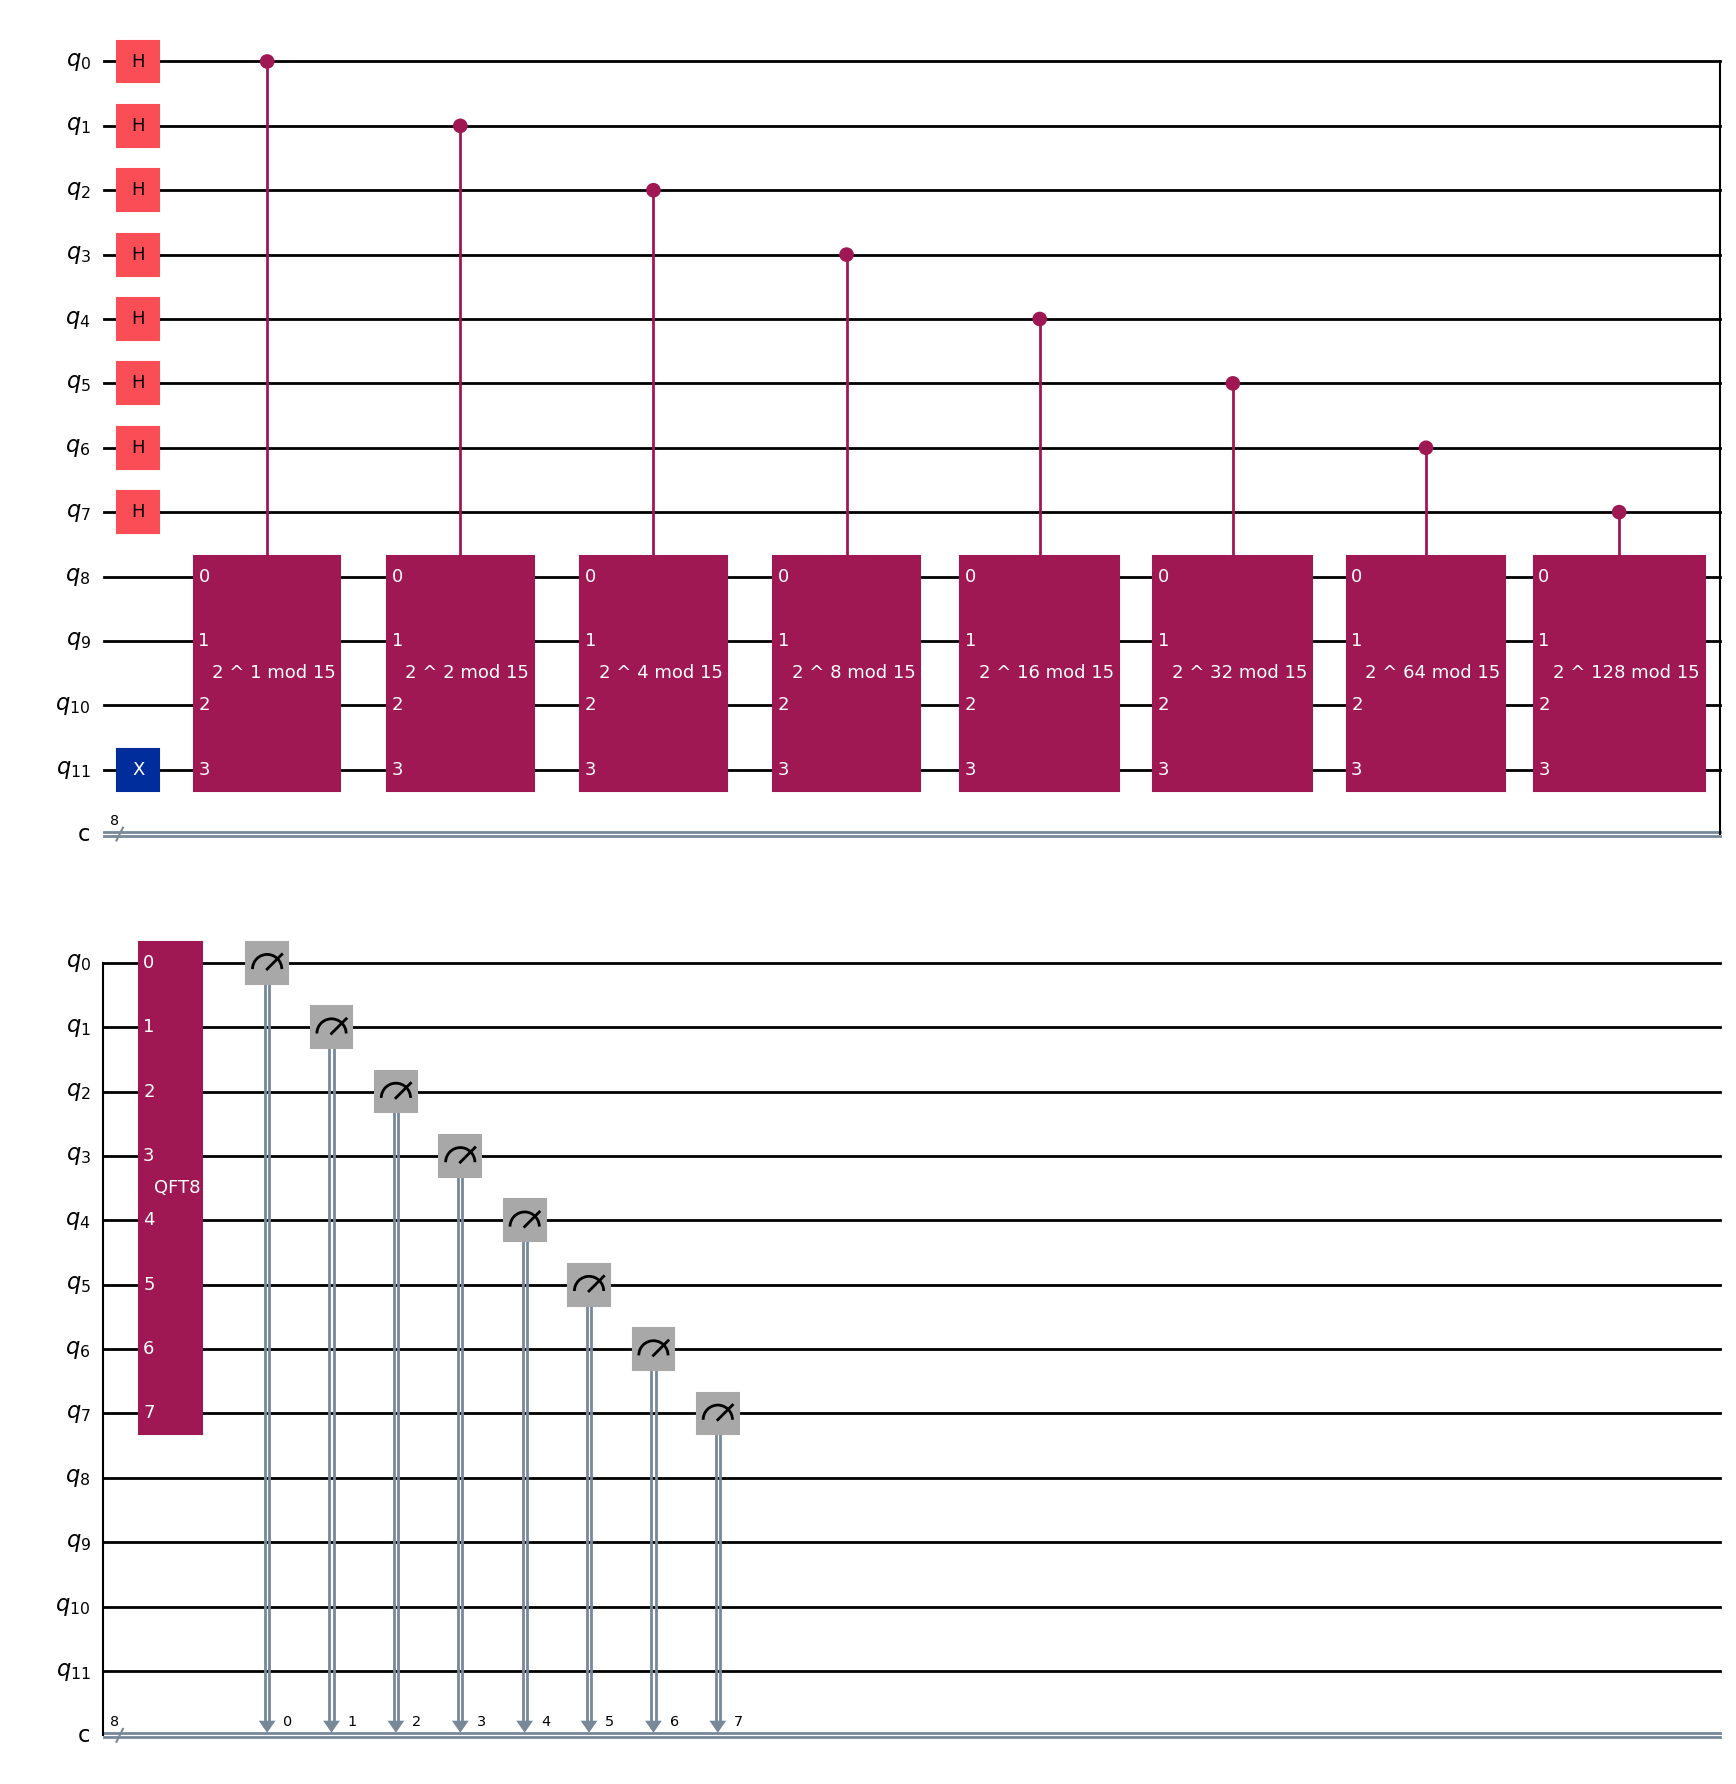

In [1]:
from qiskit import QuantumCircuit
from function_helper import QFT, c_amod15

n_count = 8
a = 2
qc = QuantumCircuit(n_count + 4, n_count)
for q in range(n_count):
    qc.h(q)

qc.x(3+n_count)

# Se añade la puerta c_amod15
for q in range(n_count):
    qc.append(c_amod15(a, 2**q), [q]+[i + n_count for i in range(4)])

# Se añade la QFT
qc.append(QFT(n_count), range(n_count))
qc.measure(range(n_count), range(n_count))
qc.draw('mpl')

## Optimización del circuito


In [2]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
backend = service.backend("ibm_torino")
print("Ya está el backend")

pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
qc_transpiled = pm.run(qc)


KeyboardInterrupt



## Ejecución en el hardware


In [ ]:
# from qiskit_ibm_runtime import SamplerV2 as Sampler

# sampler = Sampler(mode=backend)

# job = sampler.run([qc_transpiled])
# print(job.job_id())

d2ksieehb60s73ctb2og


## Los resultados


In [1]:
job_id = "d2ksieehb60s73ctb2og"
job = service.job(job_id)

NameError: name 'service' is not defined

In [ ]:
data = job.result()[0].data
values = data.c.get_counts()
count_list = list(values.values())
binary_list = list(values.keys())
values_decimal_list = [int(binary_list[i], base=2) for i in range(0, len(binary_list))]

x: list[int] = values_decimal_list
y: list[int] = count_list
# Es necesario ordenar los números ya que sino el plt no funciona bien
data_decimal: dict[int, int] = dict(zip(x, y))
sort_decimal_data: dict[int, int] = dict(sorted(data_decimal.items()))
print(sort_decimal_data)
x = list(sort_decimal_data.keys())
y = list(sort_decimal_data.values())

# Ahora los números más frecuentes
sort_count_data: dict[int, int] = dict(
    sorted(data_decimal.items(), key=lambda x: x[1], reverse=True))

{0: 24, 1: 27, 2: 27, 3: 28, 4: 18, 5: 19, 6: 14, 7: 17, 8: 15, 9: 17, 10: 19, 11: 11, 12: 10, 13: 9, 14: 15, 15: 7, 16: 17, 17: 16, 18: 24, 19: 19, 20: 18, 21: 12, 22: 17, 23: 15, 24: 12, 25: 4, 26: 11, 27: 10, 28: 9, 29: 6, 30: 6, 31: 5, 32: 35, 33: 35, 34: 26, 35: 37, 36: 14, 37: 19, 38: 22, 39: 23, 40: 30, 41: 19, 42: 26, 43: 17, 44: 13, 45: 12, 46: 6, 47: 18, 48: 20, 49: 23, 50: 21, 51: 20, 52: 14, 53: 16, 54: 19, 55: 10, 56: 9, 57: 7, 58: 11, 59: 10, 60: 8, 61: 7, 62: 7, 63: 7, 64: 41, 65: 26, 66: 29, 67: 33, 68: 41, 69: 32, 70: 26, 71: 23, 72: 27, 73: 16, 74: 15, 75: 15, 76: 4, 77: 9, 78: 8, 79: 9, 80: 32, 81: 20, 82: 26, 83: 24, 84: 19, 85: 15, 86: 21, 87: 13, 88: 11, 89: 9, 90: 8, 91: 11, 92: 5, 93: 6, 94: 10, 95: 5, 96: 27, 97: 24, 98: 18, 99: 29, 100: 20, 101: 20, 102: 16, 103: 25, 104: 18, 105: 10, 106: 23, 107: 12, 108: 14, 109: 15, 110: 8, 111: 9, 112: 20, 113: 20, 114: 23, 115: 17, 116: 13, 117: 16, 118: 9, 119: 10, 120: 14, 121: 9, 122: 10, 123: 16, 124: 6, 125: 6, 126:

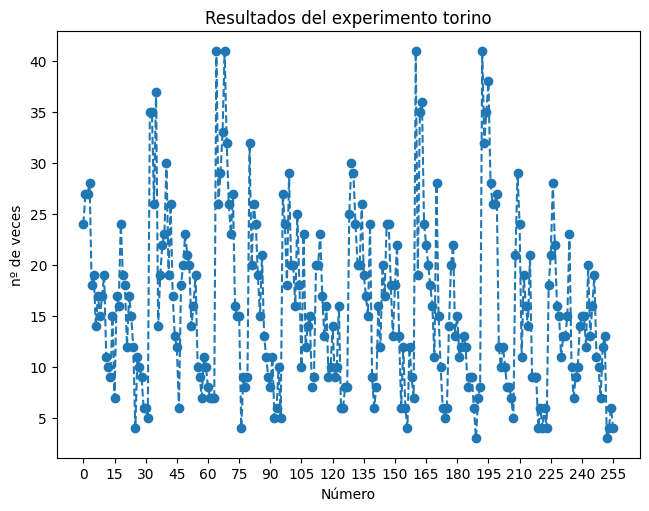

In [6]:
import matplotlib.pyplot as plt

plt.plot(x, y, '--o')
plt.tight_layout()
plt.title('Resultados del experimento torino')
plt.xlabel('Número')
plt.xticks(range(0, len(x), 15))
plt.ylabel('nº de veces')

plt.savefig('Resultados_de_experimento_torino.png', dpi=300)
plt.show()

## Ahora la extracción y exportación de datos a Excel


In [7]:
import pandas as pd

df = pd.DataFrame({'Número': x, 'Frecuencia': y})

In [8]:
with pd.ExcelWriter('QPU IBM Torino.xlsx') as writer:

    df.to_excel(writer, sheet_name='QPU_IBM torino', index=False)